In [ ]:
# remove duplicate
# remove zeros based columns greater than 70%
# balanced dataset
# remove collinear columns
# used pandas profiling to get some insights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret
from pycaret.classification import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('training_set.csv')

In [4]:
df.head()

X1    X2    X3     X4    X5    X6    X7    X8   X9   X10  X11   X12  X13  \
0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.0   
1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.0  0.56  0.0  0.56  0.0   
2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.0   
3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.0  0.00  0.0  1.29  0.0   
4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.0  0.00  0.0  0.00  0.0   

    X14  X15   X16   X17   X18   X19  X20   X21  X22   X23   X24  X25  X26  \
0  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.0  0.0   
1  0.00  0.0  0.00  0.00  0.56  3.38  0.0  1.12  0.0  0.00  0.00  0.0  0.0   
2  0.00  0.0  0.00  0.00  0.00  8.10  0.0  0.00  0.0  0.00  0.00  0.0  0.0   
3  0.00  0.0  1.29  0.64  0.00  1.93  0.0  2.58  0.0  0.64  0.00  0.0  0.0   
4  0.58  0.0  0.58  0.58  0.58  0.58  0.0  1.74  0.0  0.00  1.16  0.0  0.0   

   X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   X42  X43  X44   X45  X46  X47  X48  X49    X50  X51    X52    X53    X54  \
0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  1.342  0.000  0.000   
1  0.0  0.0  0.0  0.56  0.0  0.0  0.0  0.0  0.083  0.0  0.503  0.000  0.083   
2  0.0  0.0  0.0  2.70  0.0  0.0  0.0  0.0  0.000  0.0  0.000  0.000  0.000   
3  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  0.462  0.370  0.000   
4  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  0.239  0.239  0.000   

      X55  X56  X57  Y  
0   1.200    2   12  0  
1  16.304  148  375  1  
2   1.000    1    5  0  
3   2.440   22  122  1  
4   3.338  123  207  1

In [5]:
df.shape

(3910, 58)

In [6]:
df.describe()

X1           X2           X3           X4           X5  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.102990     0.206419     0.284419     0.062074     0.311309   
std       0.296322     1.253828     0.504352     1.369361     0.656195   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.430000     0.000000     0.387500   
max       4.340000    14.280000     4.540000    42.810000     9.090000   

                X6           X7           X8           X9          X10  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.095974     0.112320     0.106041     0.091146     0.244345   
std       0.261455     0.389516     0.398694     0.271417     0.667065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.170000   
max       3.570000     7.270000    11.110000     3.230000    18.180000   

               X11          X12          X13          X14          X15  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.060808     0.553685     0.094113     0.057205     0.048545   
std       0.203018     0.876412     0.303433     0.307892     0.255293   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.140000     0.000000     0.000000     0.000000   
75%       0.000000     0.820000     0.000000     0.000000     0.000000   
max       2.610000     9.670000     5.550000     5.550000     4.410000   

               X16          X17          X18          X19          X20  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.246598     0.142780     0.185514     1.660939     0.083880   
std       0.799327     0.444164     0.526497     1.760214     0.439199   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.310000     0.000000   
75%       0.110000     0.000000     0.000000     2.637500     0.000000   
max      20.000000     7.140000     7.690000    18.750000     6.320000   

               X21          X22          X23          X24          X25  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.818253     0.112113     0.101343     0.095199     0.565790   
std       1.210078     0.990195     0.345887     0.443482     1.733593   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.235000     0.000000     0.000000     0.000000     0.000000   
75%       1.270000     0.000000     0.000000     0.000000     0.000000   
max      11.110000    17.100000     5.450000    12.500000    20.830000   

               X26          X27          X28          X29          X30  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.266668     0.757120     0.125312     0.100320     0.105274   
std       0.892676     3.321562     0.545827     0.608313     0.464483   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      16.660000    33.330000     9.090000    14.280000     5.880000   

              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(df,interactions = None,correlations={"cramers": {"calculate": False},"spearman": {"calculate": False},"kendall": {"calculate": False},"phi_k": {"calculate": False}})
profile.to_file("output2.html")

In [8]:
dup = df[df.duplicated(keep = False)]

In [9]:
a = dup.columns
a =list(a)

In [10]:
dup = dup.sort_values(a)

In [11]:
dup

X1     X2    X3   X4    X5    X6    X7    X8    X9   X10   X11   X12  \
1613  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3318  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3791  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
265   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1323  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1400  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1495  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1623  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1669  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1986  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2025  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2210  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2286  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2580  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3044  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3072  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3171  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3209  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3369  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3519  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3801  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
25    0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
99    0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
179   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
531   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1142  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2006  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2187  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2236  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2521  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3456  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
50    0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
254   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1546  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2370  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3259  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3273  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
841   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1266  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3479  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3663  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
255   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
626   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1084  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1631  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2479  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3009  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3815  0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
199   0.00   0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1213  0.

In [12]:
df = df.drop_duplicates(keep = 'first')

In [13]:
df.shape

(3614, 58)

<AxesSubplot:>

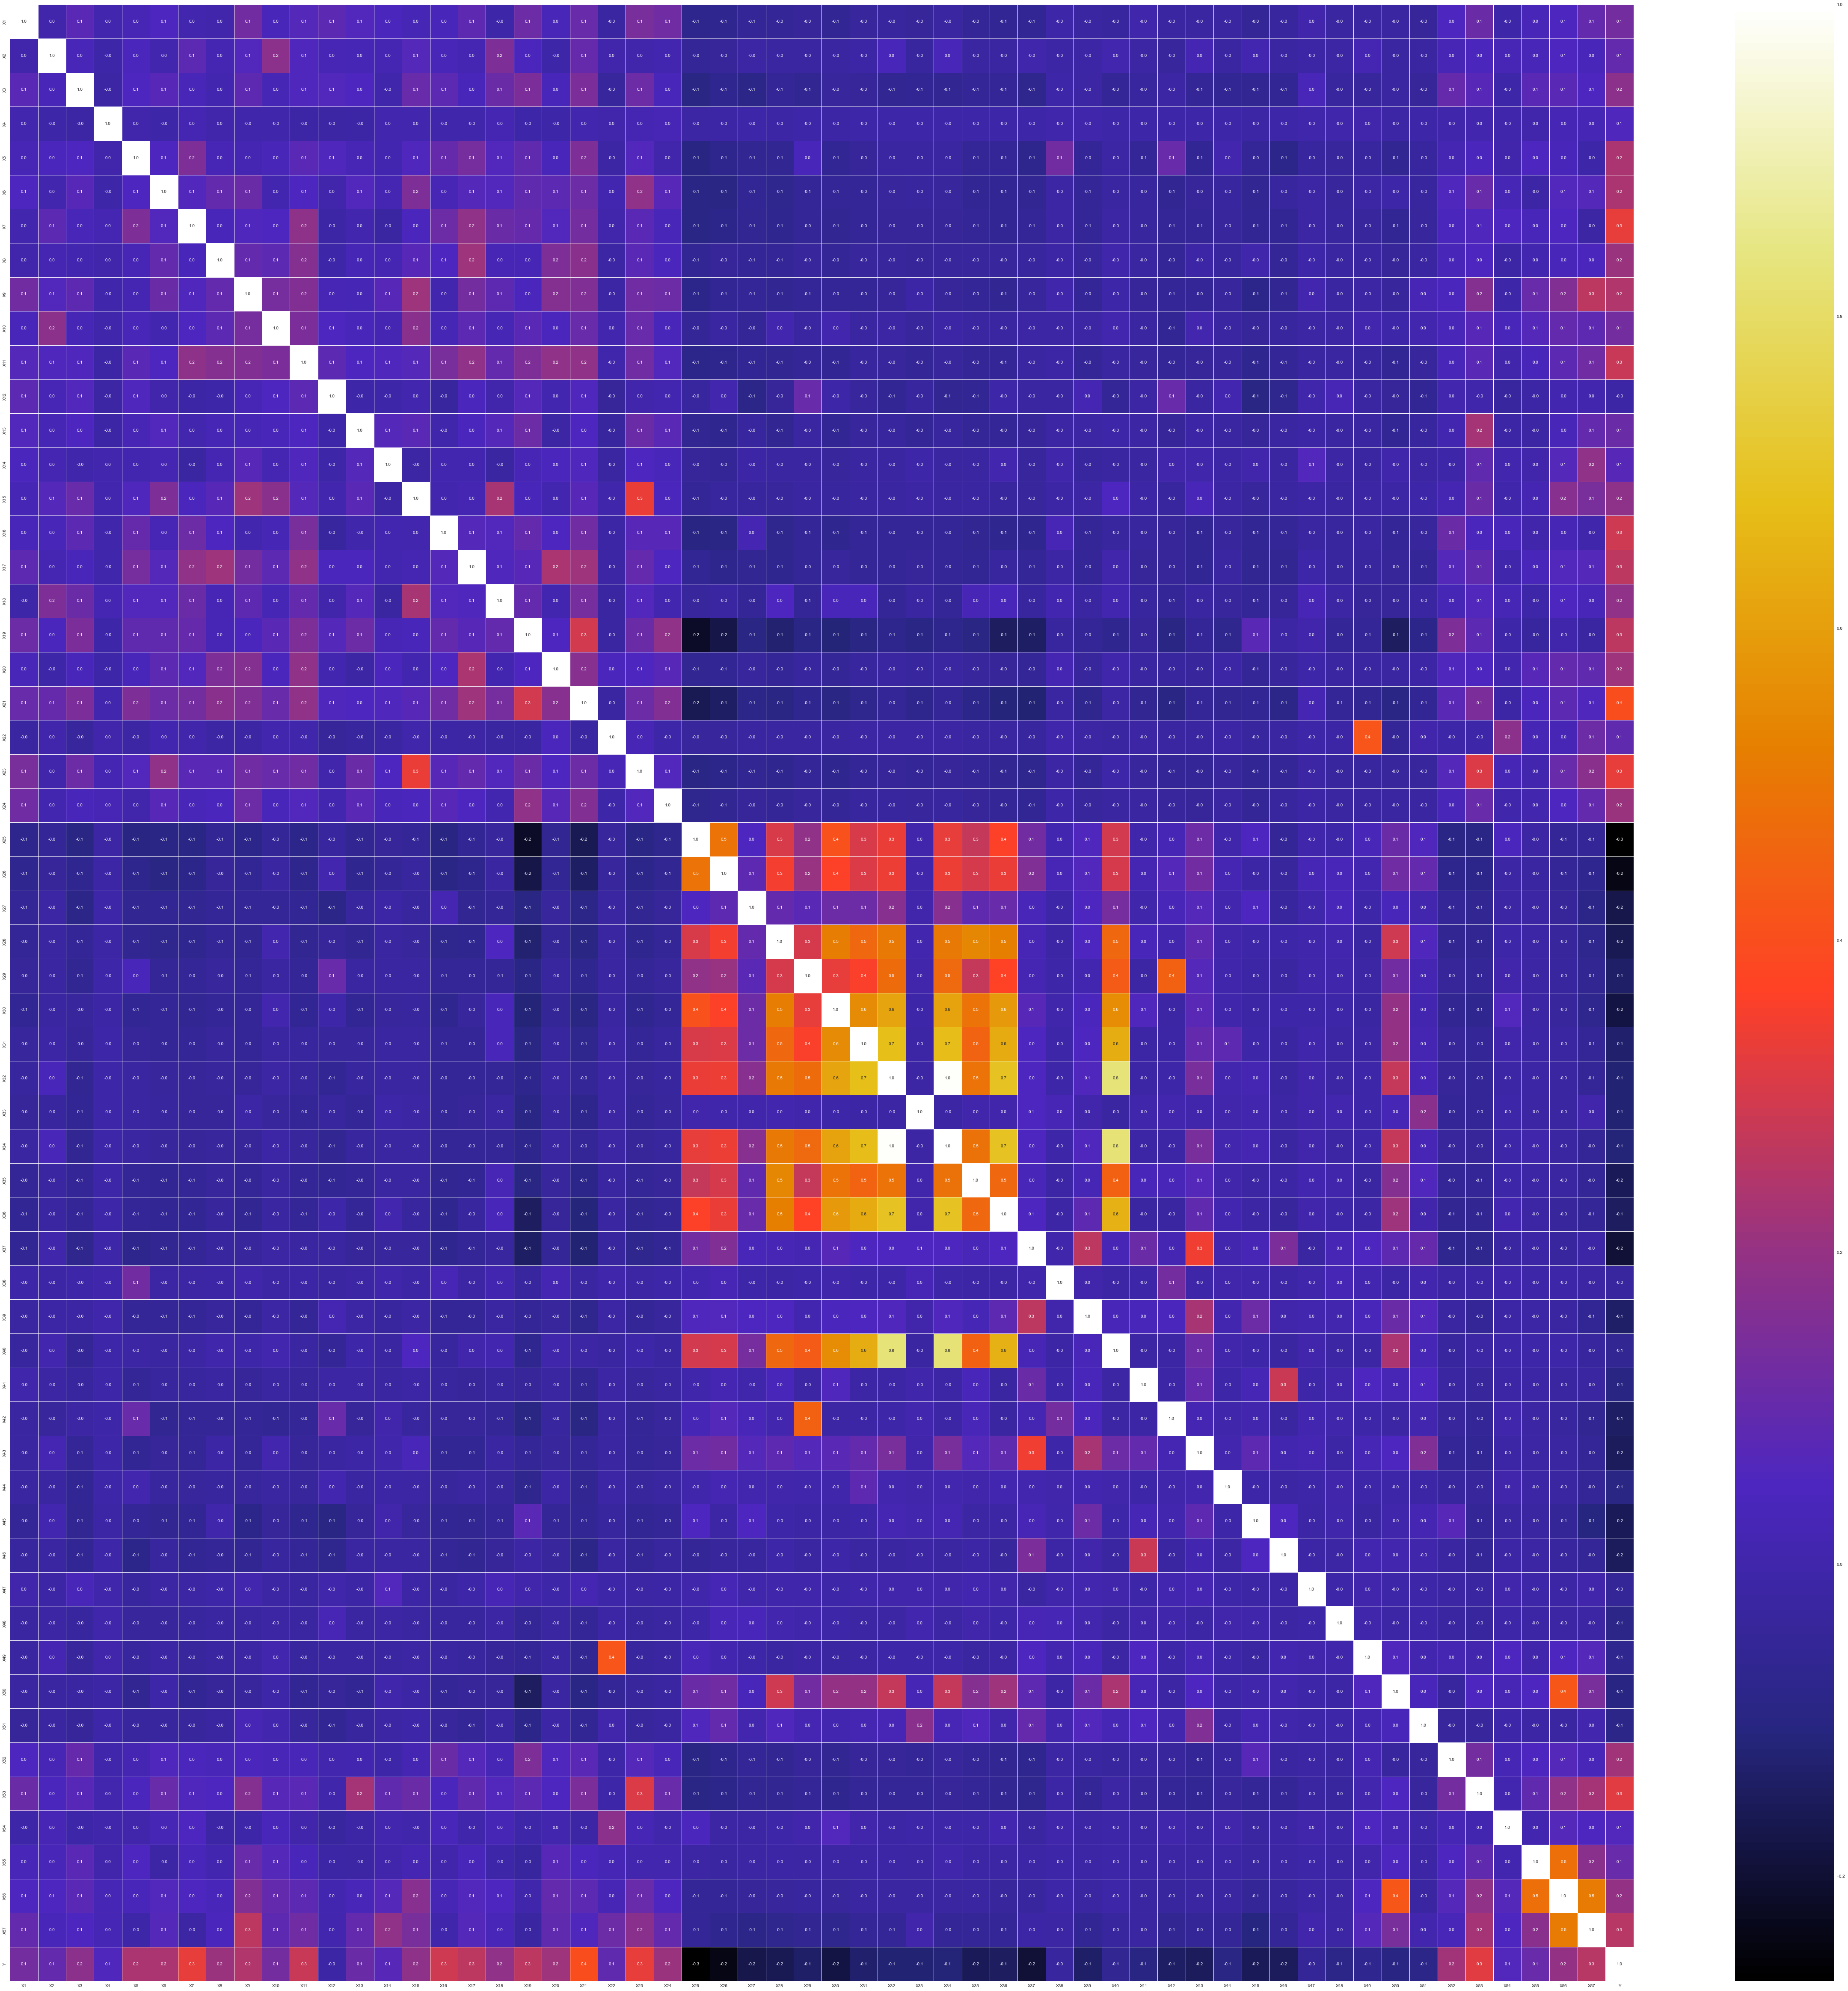

In [14]:
f,ax = plt.subplots(figsize=(85, 85))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax,cmap = 'CMRmap')

## 1. Modelling with Removing features which have zero values more than 70%

In [15]:
l = []
for i in df.columns[:-4]:
    print(df[i].name,'Has',(df[i].value_counts()[0.00]/len(df)*100),'Percent Zero Values')
    if (df[i].value_counts()[0.00]/len(df)) > 0.7:
        l.append(df[i].name)

X1 Has 76.81239623685667 Percent Zero Values
X2 Has 80.79690094078583 Percent Zero Values
X3 Has 57.41560597675706 Percent Zero Values
X4 Has 98.92086330935251 Percent Zero Values
X5 Has 60.29330381848368 Percent Zero Values
X6 Has 77.58716104039846 Percent Zero Values
X7 Has 81.87603763143332 Percent Zero Values
X8 Has 81.37797454344216 Percent Zero Values
X9 Has 82.78915329275041 Percent Zero Values
X10 Has 70.86330935251799 Percent Zero Values
X11 Has 84.42169341449916 Percent Zero Values
X12 Has 47.482014388489205 Percent Zero Values
X13 Has 80.79690094078583 Percent Zero Values
X14 Has 91.97565024903155 Percent Zero Values
X15 Has 92.86109573879358 Percent Zero Values
X16 Has 72.3021582733813 Percent Zero Values
X17 Has 78.44493635860542 Percent Zero Values
X18 Has 76.92307692307693 Percent Zero Values
X19 Has 27.11676812396237 Percent Zero Values
X20 Has 90.67515218594355 Percent Zero Values
X21 Has 45.87714443829552 Percent Zero Values
X22 Has 97.59269507470947 Percent Zero Valu

In [16]:
len(l)

46

In [17]:
df1 = df.drop(l,axis = 1)

In [18]:
df1.head()

X3    X5   X12   X19   X21    X50    X52    X53     X55  X56  X57  Y
0  4.34  0.00  0.00  0.00  0.00  0.000  1.342  0.000   1.200    2   12  0
1  0.56  1.12  0.56  3.38  1.12  0.083  0.503  0.000  16.304  148  375  1
2  0.00  0.00  0.00  8.10  0.00  0.000  0.000  0.000   1.000    1    5  0
3  0.64  1.93  1.29  1.93  2.58  0.000  0.462  0.370   2.440   22  122  1
4  0.00  0.58  0.00  0.58  1.74  0.000  0.239  0.239   3.338  123  207  1

In [ ]:
"""fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i, column in enumerate(df.iloc[:,:-1]):
    sns.distplot(df[column],ax = axes[i//2,i%1])"""

<AxesSubplot:xlabel='Y', ylabel='count'>

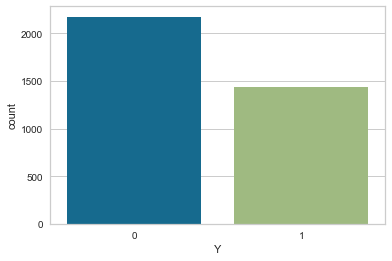

In [19]:
sns.countplot(df1['Y'])

In [20]:
df1['X55'].value_counts()#sort_values(ascending = False)

1.000      184
2.000       61
1.500       32
1.666       32
1.250       25
          ... 
86.700       1
3.199        1
239.571      1
2.051        1
9.560        1
Name: X55, Length: 1950, dtype: int64

<AxesSubplot:xlabel='X55'>

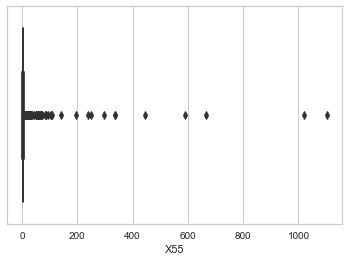

In [21]:
sns.boxplot(df1['X55'])

<AxesSubplot:xlabel='X56'>

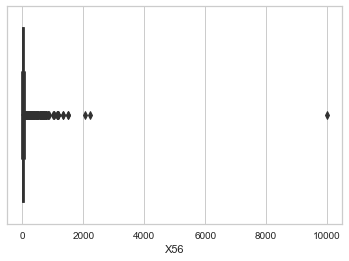

In [22]:
sns.boxplot(df1['X56'])

<AxesSubplot:xlabel='X57'>

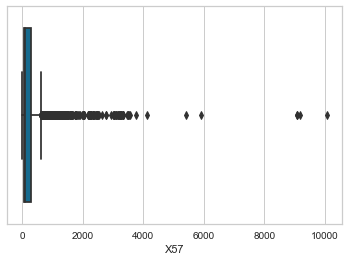

In [23]:
sns.boxplot(df1['X57'])

<AxesSubplot:xlabel='X53'>

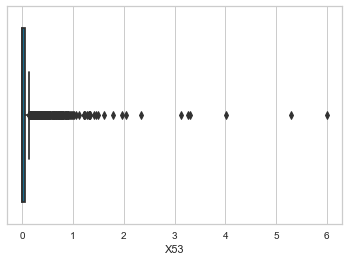

In [24]:
sns.boxplot(df1['X53'])

In [25]:
df1['X53'].value_counts()

0.000    2496
0.061      13
0.118      10
0.014       9
0.063       9
0.030       8
0.056       8
0.021       8
0.031       8
0.107       8
0.157       7
0.016       7
0.053       7
0.024       7
0.167       7
0.141       7
0.182       7
0.046       6
0.032       6
0.054       6
0.041       6
0.075       6
0.037       6
0.128       6
0.168       6
0.109       6
0.191       6
0.013       6
0.105       6
0.048       6
0.027       6
0.159       6
0.062       6
0.103       6
0.043       6
0.029       6
0.071       6
0.114       6
0.036       5
0.150       5
0.211       5
0.050       5
0.197       5
0.196       5
0.223       5
0.094       5
0.022       5
0.162       5
0.055       5
0.160       5
0.116       5
0.180       5
0.121       5
0.124       5
0.169       5
0.017       5
0.233       5
0.065       5
0.033       5
0.165       5
0.166       5
0.158       5
0.171       5
0.161       5
0.111       5
0.132       5
0.085       5
0.082       4
0.023       4
0.034       4
0.059       4
0.232 

In [26]:
df1.skew()

X3      2.903080
X5      4.286338
X12     2.829342
X19     1.581812
X21     2.286628
X50    14.518431
X52    18.357977
X53    10.847230
X55    24.596397
X56    31.323509
X57     6.628108
Y       0.417376
dtype: float64

<AxesSubplot:xlabel='X55', ylabel='Count'>

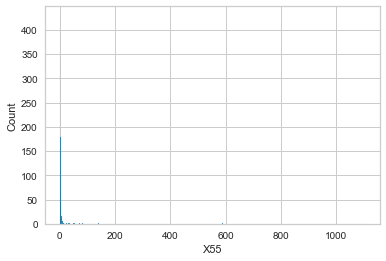

In [27]:
sns.histplot(df1['X55'])

<AxesSubplot:xlabel='X19'>

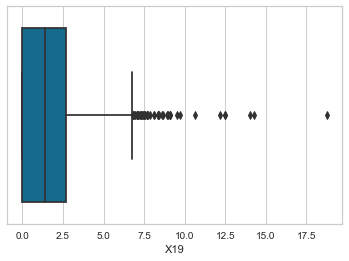

In [28]:
sns.boxplot(df1['X19'])

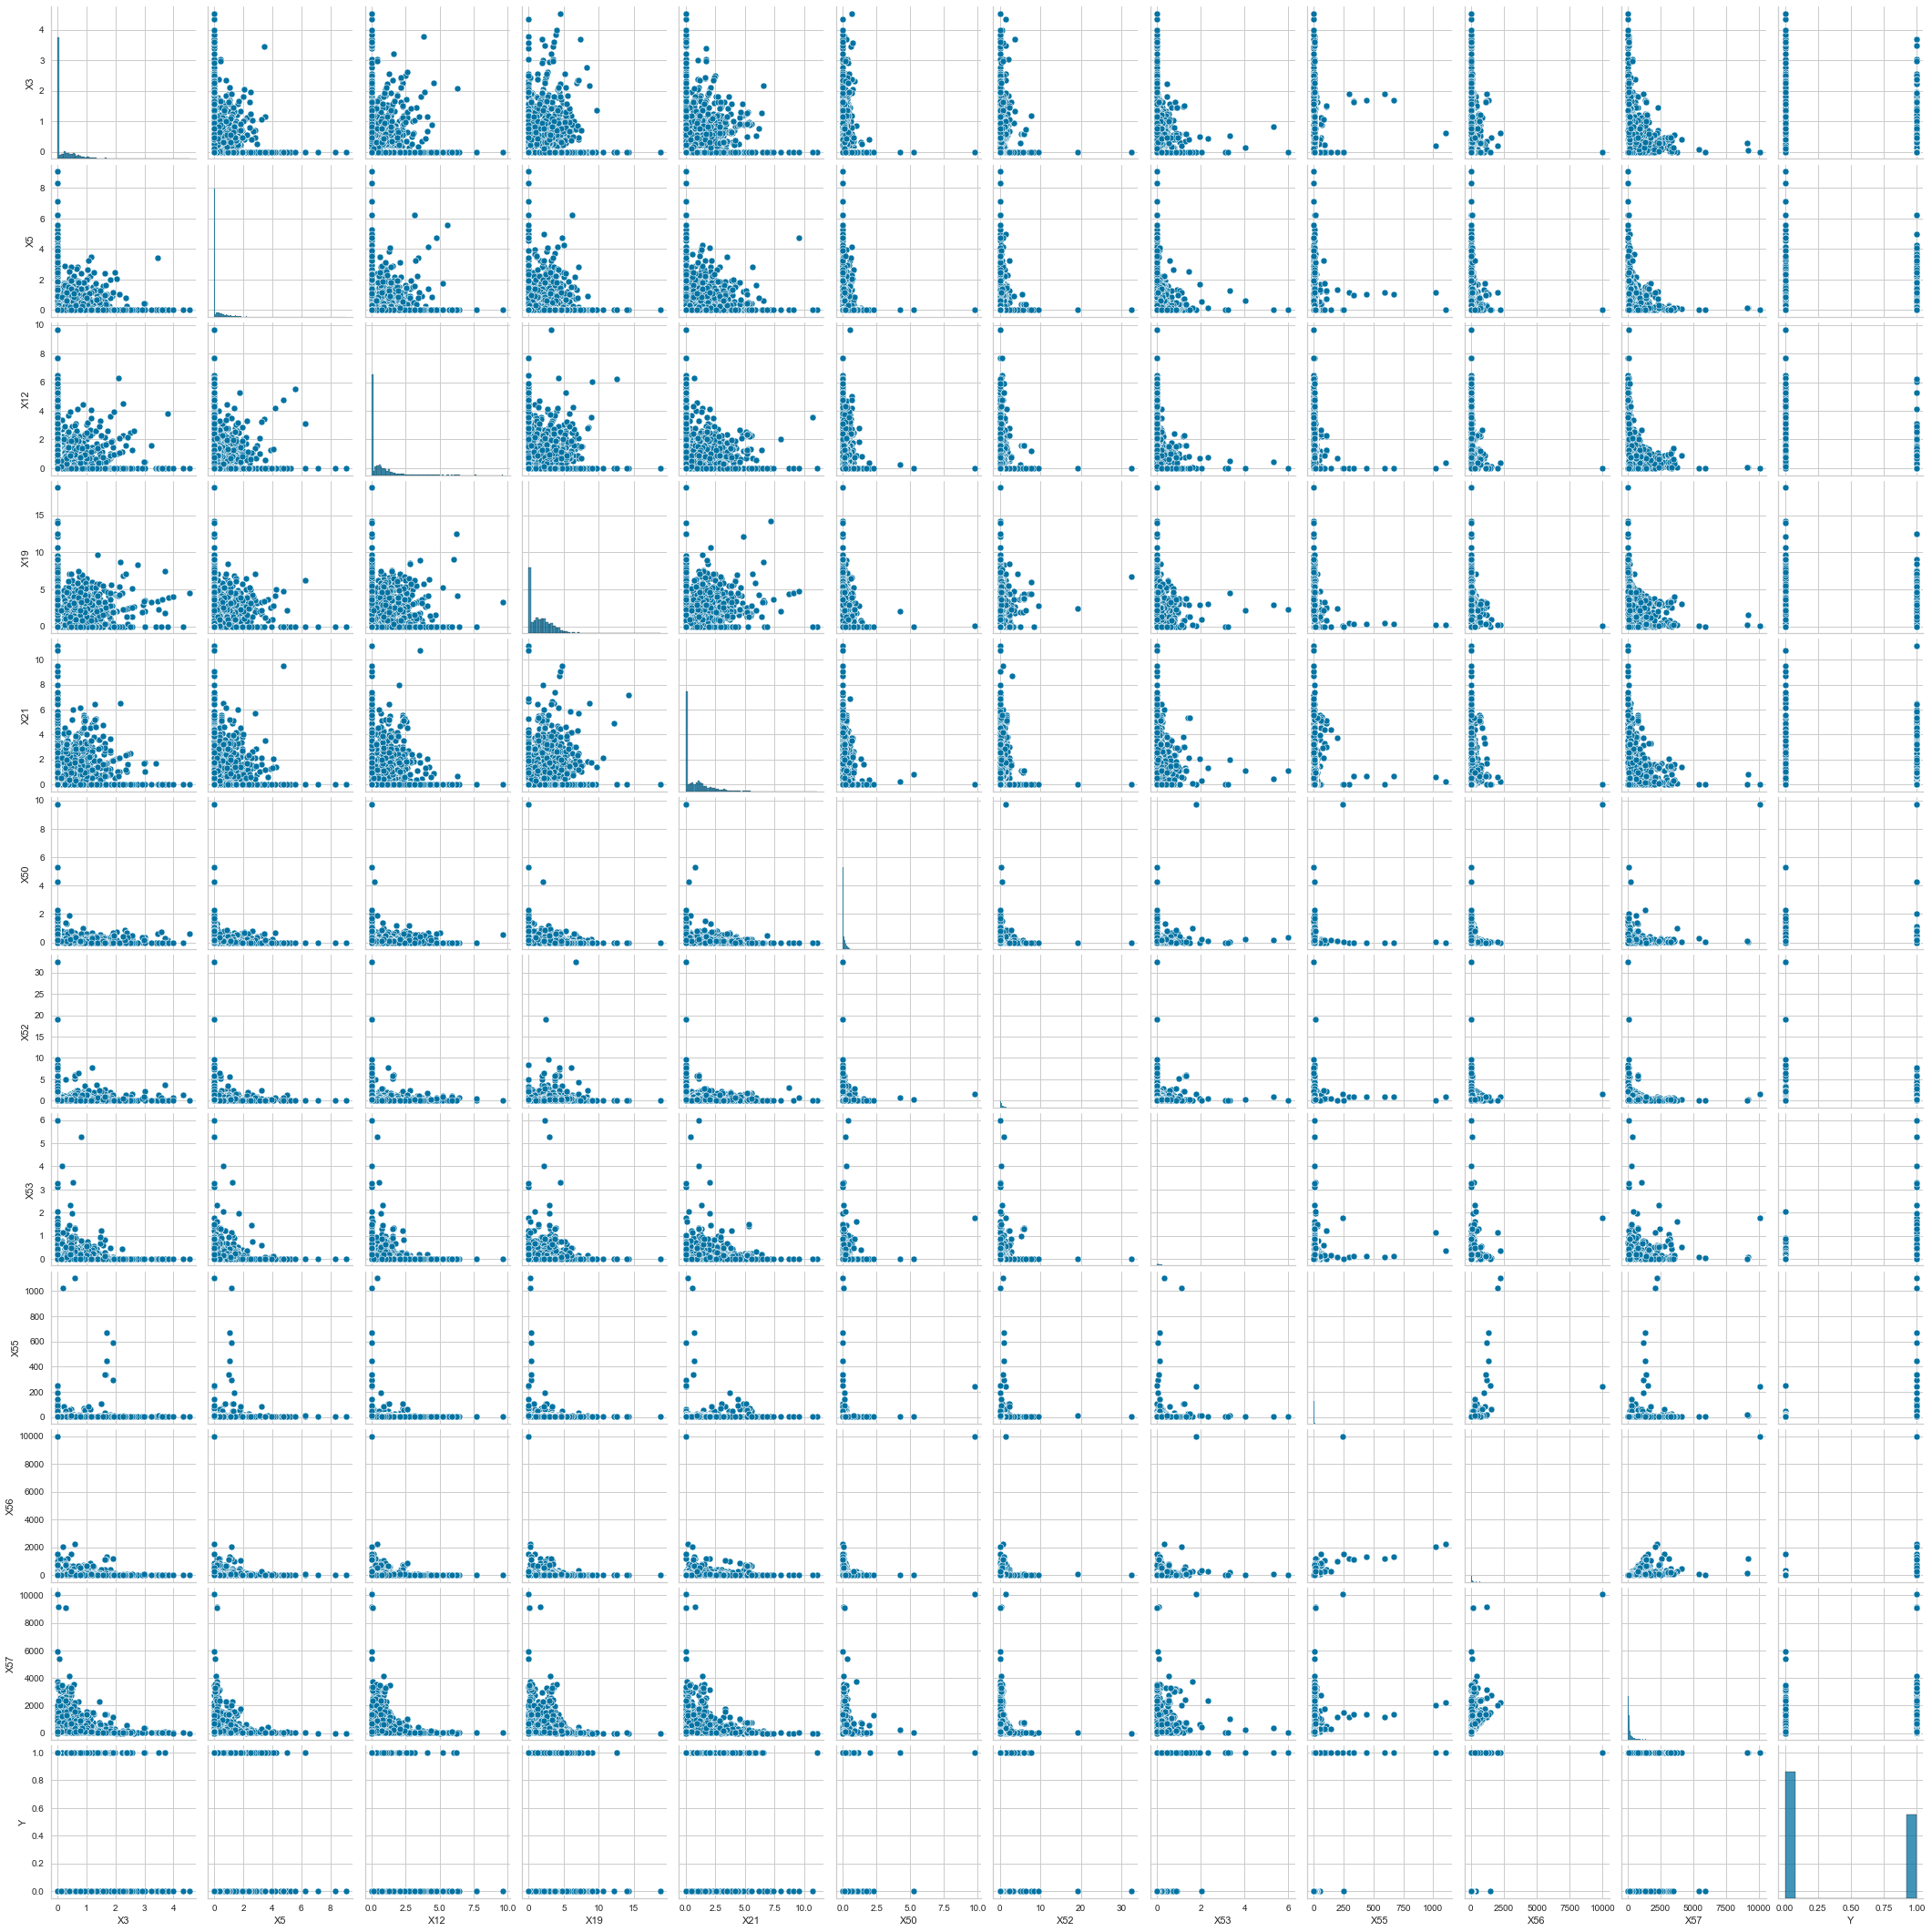

In [29]:
sns.pairplot(df1)

<AxesSubplot:>

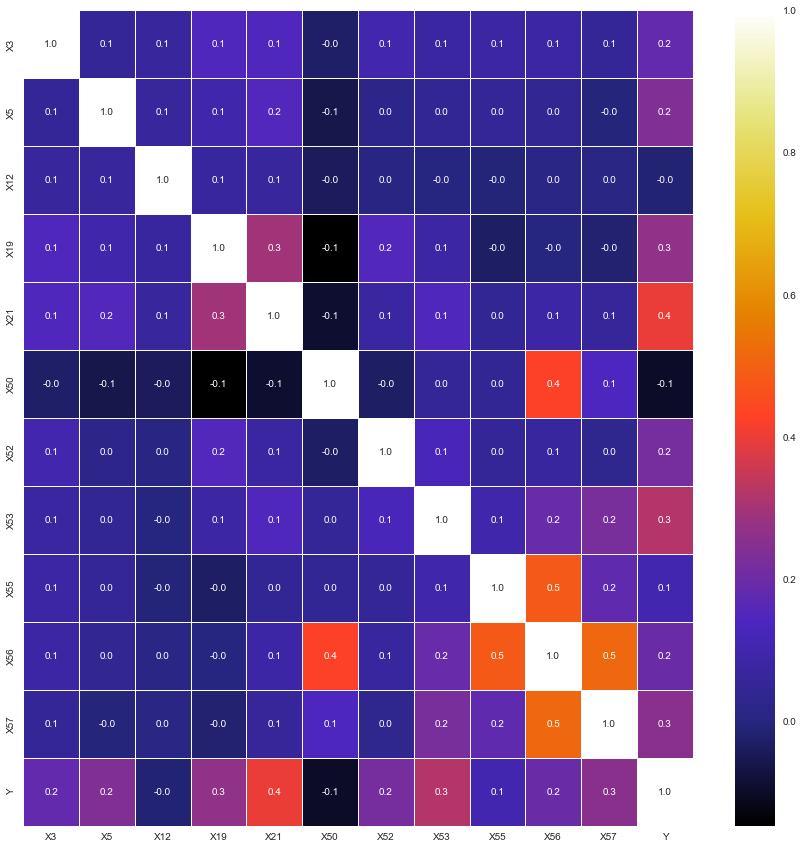

In [30]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax,cmap = 'CMRmap')

### 1.a. XGBoost without Hyperparameter tuning

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
df1 = df1.reset_index(drop = True)

In [33]:
x = df1.iloc[:,:-1]
y = df1['Y']

In [34]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.2,stratify = y)

In [35]:
clf = xgb.XGBClassifier(max_depth=15, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(x_train, y_train)
predictions = clf.predict(x_valid)

In [36]:
print ("accuracy: %0.3f " % accuracy_score(y_valid, predictions))

accuracy: 0.903 


### 1.b. XGBoost with Hyperparameter Tuning using HyperOPT

In [37]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [38]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform("n_estimators", 5, 200, 1),#10,
        'seed': 0
    }

In [39]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_valid, y_valid)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",verbose=False)
    

    pred = clf.predict(x_valid)
    accuracy = accuracy_score(y_valid, pred)
    print ("SCORE:", accuracy)
    return {'loss': accuracy, 'status': STATUS_OK }

In [40]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.8907330567081605                                                                                                     
SCORE:                                                                                                                 
0.8796680497925311                                                                                                     
SCORE:                                                                                                                 
0.8699861687413555                                                                                                     
SCORE:                                                                                                                 
0.8727524204702628                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8326417704011065                                                                                                     
SCORE:                                                                                                                 
0.8603042876901799                                                                                                     
SCORE:                                                                                                                 
0.8423236514522822                                                                                                     
SCORE:                                                                                                                 
0.8547717842323651                                                                                                     
SCORE:                                  

In [41]:
print(best_hyperparams)

{'colsample_bytree': 0.7834755457922538, 'gamma': 8.032349020636557, 'max_depth': 7.0, 'min_child_weight': 2.0, 'n_estimators': 5.0, 'reg_alpha': 169.0, 'reg_lambda': 0.6510772208495825}


In [42]:
clf = xgb.XGBClassifier(objective = 'binary:logistic',colsample_bytree = 0.9804386431754267, gamma = 6.0, max_depth = 9, min_child_weight = 7.0, n_estimators = 7, reg_alpha = 179.0, reg_lambda = 0.7208104163502401)
%time clf.fit(x_train, y_train)

Wall time: 25.9 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9804386431754267, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=6.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=9,
              max_leaves=0, min_child_weight=7.0, missing=nan,
              monotone_constraints='()', n_estimators=7, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=179.0, reg_lambda=0.7208104163502401, ...)

In [43]:
pred = clf.predict(x_valid)
accuracy = accuracy_score(y_valid, pred)
accuracy

0.8672199170124482

### 1.c. XGBoost with Hyperparameter Tuning using Optuna

In [44]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_valid, label=y_valid)

In [45]:
def objective(trial):
    
# params specifies the XGBoost hyperparameters to be tuned
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 600),
        'max_depth': trial.suggest_int('max_depth', 10, 20),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, .1),
        'subsample': trial.suggest_uniform('subsample', 0.50, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
        'gamma': trial.suggest_int('gamma', 0, 10),
        'tree_method': 'gpu_hist',  
        'objective': 'binary:logistic'
    }
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    # trials will be evaluated based on their accuracy on the test set
    accuracy = accuracy_score(y_valid, pred_labels)
    return accuracy

In [46]:
import optuna   

study = optuna.create_study()
study.optimize(objective,n_trials=10) 

[I 2022-08-09 14:26:18,648] A new study created in memory with name: no-name-42c5087f-7ff3-4b76-9f7e-68543847b31d


[14:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-08-09 14:26:19,047] Trial 0 finished with value: 0.9087136929460581 and parameters: {'n_estimators': 416, 'max_depth': 17, 'learning_rate': 0.04750406993897179, 'subsample': 0.5473706872254058, 'colsample_bytree': 0.6548302886127364, 'gamma': 1}. Best is trial 0 with value: 0.9087136929460581.
[I 2022-08-09 14:26:19,104] Trial 1 finished with value: 0.8934993084370678 and parameters: {'n_estimators': 434, 'max_depth': 12, 'learning_rate': 0.08099367194328366, 'subsample': 0.7450246560164656, 'colsample_bytree': 0.860683107468652, 'gamma': 8}. Best is trial 1 with value: 0.8934993084370678.
[I 2022-08-09 14:26:19,155] Trial 2 finished with value: 0.8948824343015215 and parameters: {'n_estimators': 587, 'max_depth': 11, 'learning_rate': 0.04629982344269215, 'subsample': 0.9051004953657846, 'colsample_bytree': 0.7123384918510043, 'gamma': 10}. Best is trial 1 with value: 0.8934993084370678.
[I 2022-08-09 14:26:19,207] Trial 3 finished with value: 0.8921161825726142 and parameters:

[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  Thi

[I 2022-08-09 14:26:19,495] Trial 4 finished with value: 0.8948824343015215 and parameters: {'n_estimators': 542, 'max_depth': 15, 'learning_rate': 0.054183277898674144, 'subsample': 0.9811945975174428, 'colsample_bytree': 0.5257207517542426, 'gamma': 0}. Best is trial 3 with value: 0.8921161825726142.
[I 2022-08-09 14:26:19,683] Trial 5 finished with value: 0.9100968188105117 and parameters: {'n_estimators': 499, 'max_depth': 12, 'learning_rate': 0.09790505058686609, 'subsample': 0.8757427766605599, 'colsample_bytree': 0.8901940530695387, 'gamma': 1}. Best is trial 3 with value: 0.8921161825726142.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-08-09 14:26:19,809] Trial 6 finished with value: 0.9017980636237898 and parameters: {'n_estimators': 509, 'max_depth': 19, 'learning_rate': 0.036625414527421594, 'subsample': 0.5036302345738557, 'colsample_bytree': 0.7509420049498134, 'gamma': 7}. Best is trial 3 with value: 0.8921161825726142.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-08-09 14:26:19,904] Trial 7 finished with value: 0.9017980636237898 and parameters: {'n_estimators': 422, 'max_depth': 12, 'learning_rate': 0.025099147481768065, 'subsample': 0.5365232538439213, 'colsample_bytree': 0.9510264916592799, 'gamma': 3}. Best is trial 3 with value: 0.8921161825726142.
[I 2022-08-09 14:26:19,995] Trial 8 finished with value: 0.9100968188105117 and parameters: {'n_estimators': 588, 'max_depth': 16, 'learning_rate': 0.08879757465213096, 'subsample': 0.6613178235978976, 'colsample_bytree': 0.8383134569321168, 'gamma': 4}. Best is trial 3 with value: 0.8921161825726142.
[I 2022-08-09 14:26:20,082] Trial 9 finished with value: 0.8990318118948825 and parameters: {'n_estimators': 598, 'max_depth': 11, 'learning_rate': 0.06534514082497761, 'subsample': 0.8817370970827554, 'colsample_bytree': 0.6861709133582325, 'gamma': 4}. Best is trial 3 with value: 0.8921161825726142.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [47]:
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

Best trial: score 0.8921161825726142, params {'n_estimators': 443, 'max_depth': 13, 'learning_rate': 0.024975053379387484, 'subsample': 0.5966136404157556, 'colsample_bytree': 0.654503966281974, 'gamma': 8}


In [48]:
best_params = study.best_trial.params
best_params['tree_method'] = 'gpu_hist'      #gpu_hist is really fast
best_params['objective'] = 'binary:logistic'

In [49]:
clf = xgb.XGBClassifier(**best_params)

In [50]:
%time clf.fit(x_train, y_train)

Wall time: 916 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.654503966281974, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=8, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.024975053379387484,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=13,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=443, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
pred = clf.predict(x_valid)
accuracy = accuracy_score(y_valid, pred)
accuracy

0.9031811894882434

### 1.d. Random Forest without Hyperparameter tuning

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train, y_train)
pred8 = rfc_model.predict(x_valid)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_valid, pred8) * 100))

Accuracy for Random Forest Model: 91.15


## 2. Modelling with all features (No removal of zero values features)

In [53]:
df.head()

X1    X2    X3     X4    X5    X6    X7    X8   X9   X10  X11   X12  X13  \
0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.0   
1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.0  0.56  0.0  0.56  0.0   
2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.0   
3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.0  0.00  0.0  1.29  0.0   
4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.0  0.00  0.0  0.00  0.0   

    X14  X15   X16   X17   X18   X19  X20   X21  X22   X23   X24  X25  X26  \
0  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.0  0.0   
1  0.00  0.0  0.00  0.00  0.56  3.38  0.0  1.12  0.0  0.00  0.00  0.0  0.0   
2  0.00  0.0  0.00  0.00  0.00  8.10  0.0  0.00  0.0  0.00  0.00  0.0  0.0   
3  0.00  0.0  1.29  0.64  0.00  1.93  0.0  2.58  0.0  0.64  0.00  0.0  0.0   
4  0.58  0.0  0.58  0.58  0.58  0.58  0.0  1.74  0.0  0.00  1.16  0.0  0.0   

   X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   X42  X43  X44   X45  X46  X47  X48  X49    X50  X51    X52    X53    X54  \
0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  1.342  0.000  0.000   
1  0.0  0.0  0.0  0.56  0.0  0.0  0.0  0.0  0.083  0.0  0.503  0.000  0.083   
2  0.0  0.0  0.0  2.70  0.0  0.0  0.0  0.0  0.000  0.0  0.000  0.000  0.000   
3  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  0.462  0.370  0.000   
4  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  0.239  0.239  0.000   

      X55  X56  X57  Y  
0   1.200    2   12  0  
1  16.304  148  375  1  
2   1.000    1    5  0  
3   2.440   22  122  1  
4   3.338  123  207  1

<AxesSubplot:>

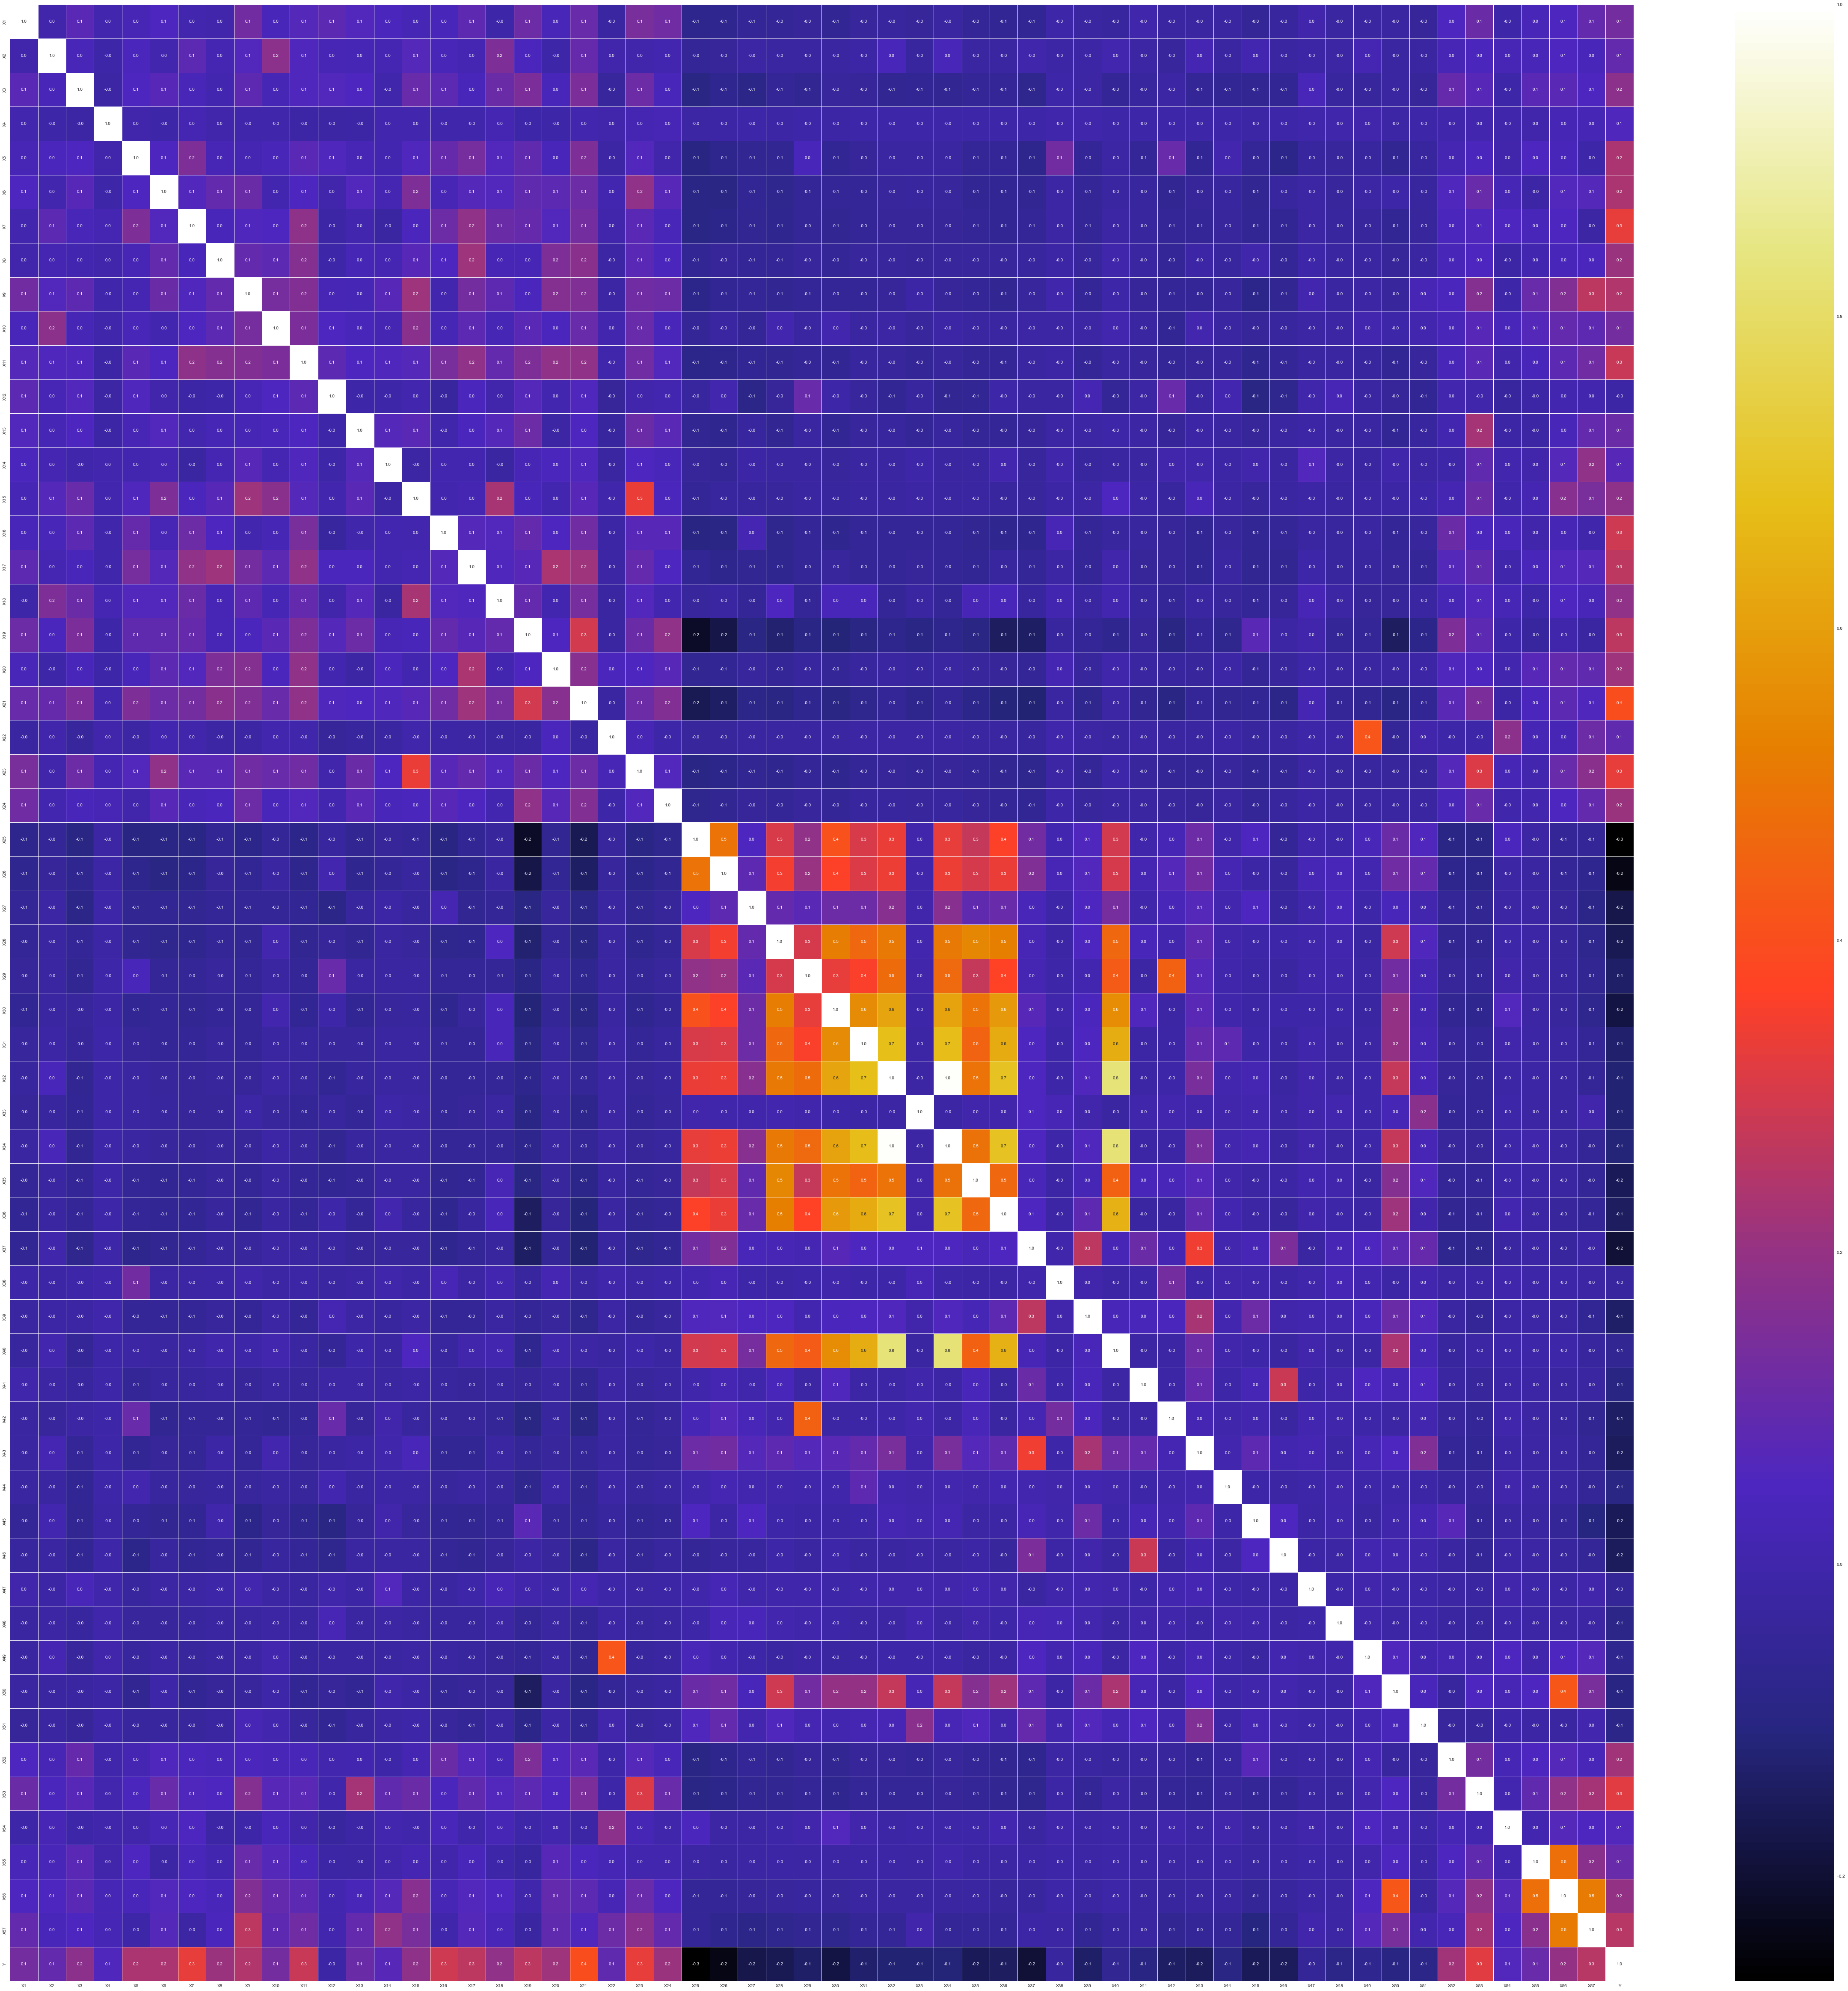

In [54]:
f,ax = plt.subplots(figsize=(85, 85))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax,cmap = 'CMRmap')

In [55]:
len(df)

3614

In [56]:
df_train = df[:2892]
df_test = df[2892:]

In [57]:
reg_experiment = setup(df_train,
                       target = 'Y',
                       session_id=126,
                       log_experiment=True,
                       experiment_name='xyz')

In [58]:
best_model = compare_models(verbose = True)

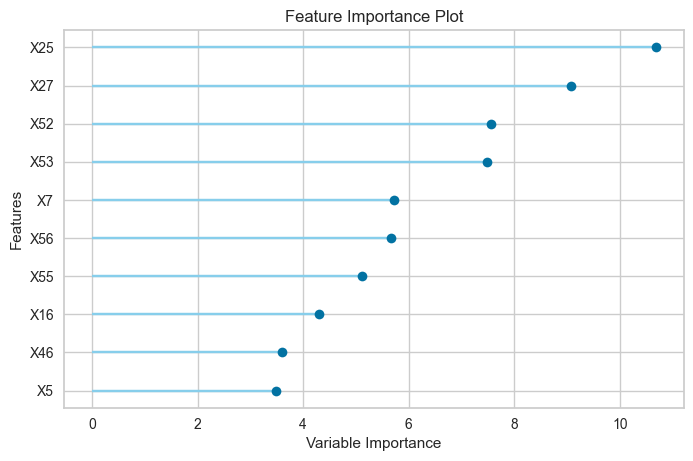

In [59]:
plot_model(best_model, plot = 'feature')

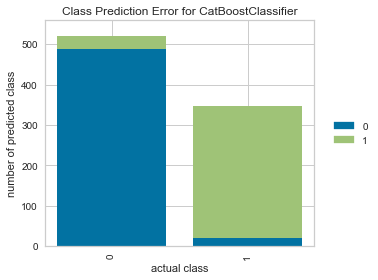

In [60]:
plot_model(best_model, plot = 'error')

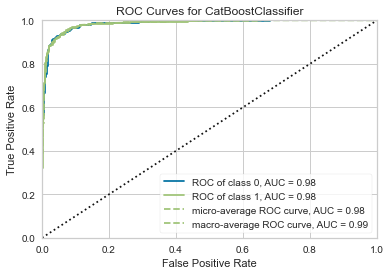

In [61]:
plot_model(best_model)

In [62]:
predictions = predict_model(best_model, data=df_test)
predictions.head()

X1    X2    X3   X4   X5   X6    X7   X8   X9   X10  ...    X51    X52  \
3102  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.000  0.000   
3103  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.143  0.000   
3104  0.0  0.84  0.84  0.0  0.0  0.0  0.84  0.0  0.0  1.68  ...  0.000  0.519   
3105  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.000  1.739   
3107  0.9  0.00  0.00  0.0  0.0  0.0  0.90  0.0  0.0  0.00  ...  0.000  0.546   

      X53  X54    X55  X56  X57  Y  Label   Score  
3102  0.0  0.0  1.384    4   18  0      0  0.9723  
3103  0.0  0.0  4.484   33  148  0      0  0.9710  
3104  0.0  0.0  5.000   43  125  1      1  0.9933  
3105  0.0  0.0  1.000    1    6  0      0  0.9240  
3107  0.0  0.0  2.818   19   62  1      1  0.9836  

[5 rows x 60 columns]

### 3. Finding and Training Best model using Pycaret without balancing and without important features

In [66]:
reg_experiment = setup(df_train,
                       target = 'Y',
                       session_id=126,
                       log_experiment=True,
                       experiment_name='xyz')

In [67]:
best_model = compare_models(verbose = True)

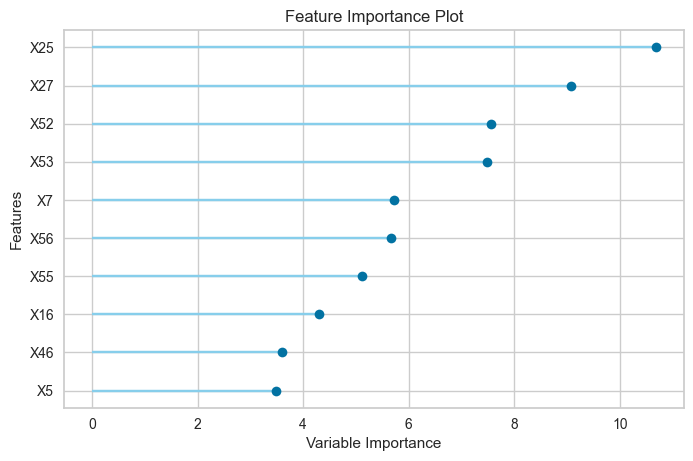

In [68]:
plot_model(best_model, plot = 'feature')

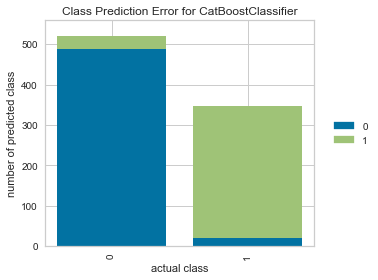

In [69]:
plot_model(best_model, plot = 'error')

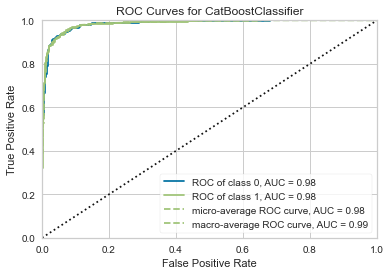

In [70]:
plot_model(best_model)

In [72]:
predictions = predict_model(best_model, data=df_test)
predictions.head()

X1    X2    X3   X4   X5   X6    X7   X8   X9   X10  ...    X51    X52  \
3102  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.000  0.000   
3103  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.143  0.000   
3104  0.0  0.84  0.84  0.0  0.0  0.0  0.84  0.0  0.0  1.68  ...  0.000  0.519   
3105  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.00  ...  0.000  1.739   
3107  0.9  0.00  0.00  0.0  0.0  0.0  0.90  0.0  0.0  0.00  ...  0.000  0.546   

      X53  X54    X55  X56  X57  Y  Label   Score  
3102  0.0  0.0  1.384    4   18  0      0  0.9723  
3103  0.0  0.0  4.484   33  148  0      0  0.9710  
3104  0.0  0.0  5.000   43  125  1      1  0.9933  
3105  0.0  0.0  1.000    1    6  0      0  0.9240  
3107  0.0  0.0  2.818   19   62  1      1  0.9836  

[5 rows x 60 columns]

### 4. a. Finding Important features using XGB Classifier

In [90]:
model = xgb.XGBClassifier()
model.fit(df.iloc[:,:-1], df.iloc[:,-1])
importances = pd.DataFrame(data={
    'Attribute': df.iloc[:,:-1].columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

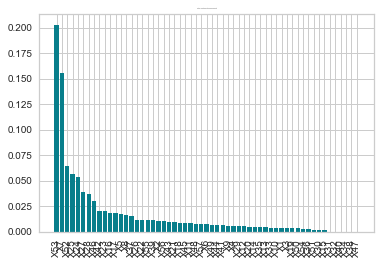

In [91]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=1)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
features =  importances[:-10]['Attribute']

In [102]:
df2 = df[np.intersect1d(df.columns, features)]

In [103]:
df2['Y'] = df['Y']

In [104]:
df2.head()

X1   X10  X11   X12  X13   X14   X16   X17   X18   X19  ...    X53  \
0  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1  0.00  0.56  0.0  0.56  0.0  0.00  0.00  0.00  0.56  3.38  ...  0.000   
2  0.00  0.00  0.0  0.00  0.0  0.00  0.00  0.00  0.00  8.10  ...  0.000   
3  0.64  0.00  0.0  1.29  0.0  0.00  1.29  0.64  0.00  1.93  ...  0.370   
4  0.58  0.00  0.0  0.00  0.0  0.58  0.58  0.58  0.58  0.58  ...  0.239   

     X54     X55  X56  X57    X6    X7    X8   X9  Y  
0  0.000   1.200    2   12  0.00  0.00  0.00  0.0  0  
1  0.083  16.304  148  375  0.56  2.25  0.00  0.0  1  
2  0.000   1.000    1    5  0.00  0.00  0.00  0.0  0  
3  0.000   2.440   22  122  0.00  0.00  0.00  0.0  1  
4  0.000   3.338  123  207  0.00  0.58  0.58  0.0  1  

[5 rows x 48 columns]

### 4. b.Balancing the Independent Variable(Y) using oversampling(SMOTE) and Training with best model using Pycaret

In [106]:
x_pos_train,x_pos_test,y_pos_train,y_pos_test = train_test_split(df2.iloc[:,:-1],df2['Y'],test_size = 0.2,shuffle = True)

In [111]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_sample(x_pos_train, y_pos_train.ravel())

In [112]:
x_train_res['Y'] = y_train_res

In [113]:
reg_experiment = setup(x_train_res,
                       target = 'Y',
                       session_id=126,
                       log_experiment=True,
                       experiment_name='xyz')

In [114]:
best_model = compare_models(verbose = True)

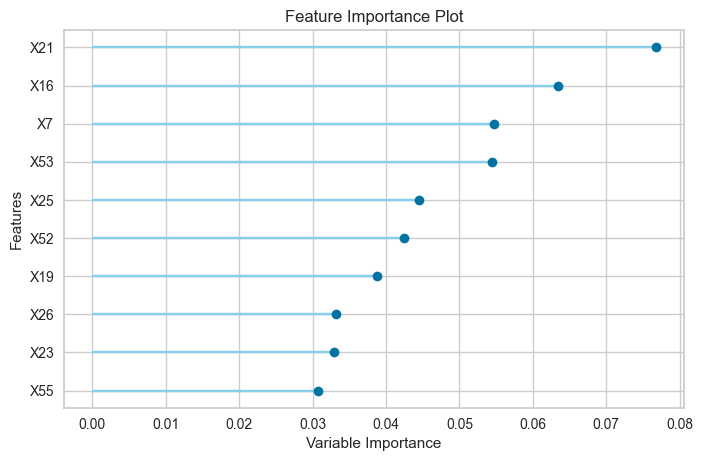

In [115]:
plot_model(best_model, plot = 'feature')

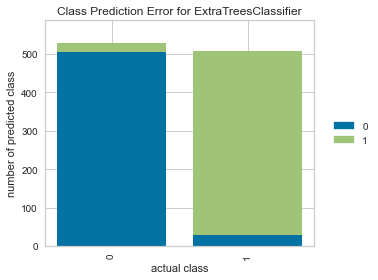

In [116]:
plot_model(best_model, plot = 'error')

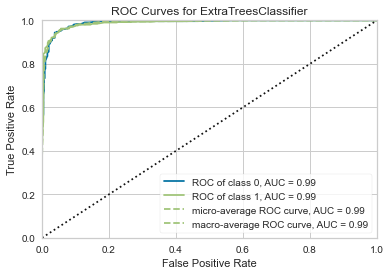

In [117]:
plot_model(best_model)

In [123]:
x_pos_test['Y'] = y_pos_test

In [125]:
predictions = predict_model(best_model, data=x_pos_test)
predictions.head()

X1   X10   X11   X12   X13  X14   X16   X17   X18   X19  ...    X55  \
2088  0.10  0.00  0.00  0.62  0.00  0.2  0.00  0.10  0.00  0.00  ...  1.915   
3229  0.00  0.00  0.00  0.18  0.00  0.0  0.00  0.00  0.00  0.00  ...  2.141   
128   0.45  0.22  0.22  1.35  0.00  0.0  0.45  1.35  0.22  1.57  ...  4.947   
2369  0.15  0.03  0.00  0.07  0.37  0.0  0.00  0.03  0.03  1.16  ...  1.111   
1931  0.90  0.00  0.00  1.80  0.00  0.0  0.00  0.00  0.00  3.60  ...  2.766   

      X56  X57    X6   X7    X8    X9  Y  Label  Score  
2088   29  339  0.10  0.1  0.52  0.10  1      1   0.83  
3229    9  212  0.00  0.0  0.00  0.00  0      0   1.00  
128   102  564  0.67  0.0  0.67  0.22  1      1   1.00  
2369    7  389  0.11  0.0  0.00  0.00  0      0   0.84  
1931   12   83  0.00  0.0  0.00  0.00  0      0   0.85  

[5 rows x 50 columns]

# Testing on Test Dataset

In [128]:
test = pd.read_csv('test_set.csv')

In [129]:
test.head()

Unnamed: 0    X1   X2    X3   X4    X5    X6    X7    X8    X9  ...  X48  \
0           0  0.70  0.0  0.70  0.0  0.00  0.00  0.00  0.00  0.00  ...  0.0   
1           1  0.00  0.0  0.84  0.0  0.84  0.00  0.84  0.00  0.00  ...  0.0   
2           2  0.46  0.3  0.46  0.0  0.05  0.12  0.05  0.28  0.43  ...  0.0   
3           3  0.10  0.2  1.01  0.0  0.80  0.80  0.50  0.00  0.80  ...  0.0   
4           4  0.00  0.0  0.72  0.0  0.72  0.00  0.72  0.00  0.00  ...  0.0   

   X49    X50  X51    X52    X53    X54     X55  X56   X57  
0  0.0  0.000  0.0  0.105  0.000  0.000   2.342   47    89  
1  0.0  0.388  0.0  0.776  0.129  0.000  10.375  168   249  
2  0.0  0.065  0.0  0.325  0.756  0.153   5.891  193  3040  
3  0.0  0.110  0.0  0.490  0.158  0.015   8.550  669  1351  
4  0.0  0.364  0.0  0.729  0.121  0.000   7.781   32   249  

[5 rows x 58 columns]

In [131]:
test = test.drop('Unnamed: 0',axis = 1)

In [132]:
predictions = predict_model(best_model, data=test)
predictions.head()

X1   X2    X3   X4    X5    X6    X7    X8    X9   X10  ...    X50  X51  \
0  0.70  0.0  0.70  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000  0.0   
1  0.00  0.0  0.84  0.0  0.84  0.00  0.84  0.00  0.00  0.00  ...  0.388  0.0   
2  0.46  0.3  0.46  0.0  0.05  0.12  0.05  0.28  0.43  0.74  ...  0.065  0.0   
3  0.10  0.2  1.01  0.0  0.80  0.80  0.50  0.00  0.80  0.10  ...  0.110  0.0   
4  0.00  0.0  0.72  0.0  0.72  0.00  0.72  0.00  0.00  0.00  ...  0.364  0.0   

     X52    X53    X54     X55  X56   X57  Label  Score  
0  0.105  0.000  0.000   2.342   47    89      0   0.91  
1  0.776  0.129  0.000  10.375  168   249      1   0.95  
2  0.325  0.756  0.153   5.891  193  3040      1   1.00  
3  0.490  0.158  0.015   8.550  669  1351      1   1.00  
4  0.729  0.121  0.000   7.781   32   249      1   1.00  

[5 rows x 59 columns]

In [133]:
predictions.to_csv('Final.csv')

In [134]:
save_model(best_model, 'saved_lr_model') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [138]:
from pycaret.classification import load_model 

saved_lr = load_model('saved_lr_model')

Transformation Pipeline and Model Successfully Loaded


In [147]:
#saved_lr.predict(test)